<a href="https://colab.research.google.com/github/astrovishalthakur/GRIP-TSF/blob/main/Marks_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>Importing important Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


<p>Loading the data using pandas <b>read_csv</b> function

In [ ]:
# Reading data from the link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [ ]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<p>checking for null values

In [ ]:
data.isna().values.any()

False

<p>Visualising the data using scatter plot

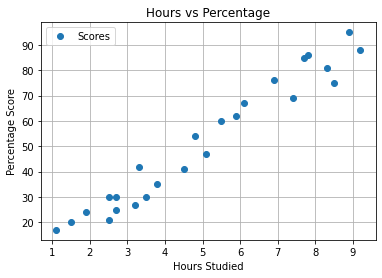

In [ ]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid(True)
plt.show()

In [ ]:
import sklearn

In [ ]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<p>importing <b>Sklearn's Linear 
Regression</b>

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

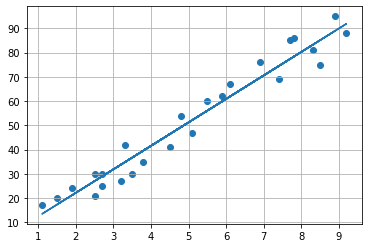

In [ ]:
# Plotting the regression line
line = lin_reg.coef_*X + lin_reg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.grid(True)
plt.show()

<h1>Making Predictions

In [ ]:
y_predict = lin_reg.predict(X_test)

<P>Comparing the data predicted vs actual data

In [ ]:
aVSp = pd.DataFrame({"Actual": y_test, "Predicted": y_predict})
aVSp

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [ ]:
def your_predictor(x):
  hours = x
  pred_9_25 = lin_reg.predict([[hours]])
  print("No of Hours = {}".format(hours))
  print("Predicted Score = {}".format(pred_9_25[0]))

In [ ]:
your_predictor(9.25)

No of Hours = 9.25
Predicted Score = 92.38611528261494


<h1><b>Evaluating the Score

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_predict)) 

Mean Absolute Error: 3.9207511902099244
